# **Romil Shah**
# Task: Predict the percentage of an student based on the no. of study hours.

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline 
print('Libraries imported successfully')

Libraries imported successfully


In [ ]:
df=pd.read_csv('/content/student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Cleaning the data

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Visualizing the data

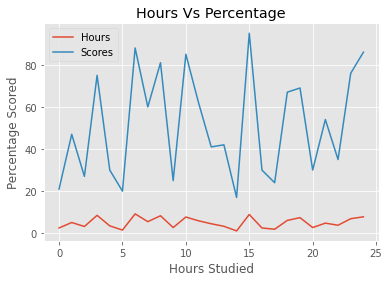

In [ ]:
#visualizing with line plot
plt.style.use('ggplot')
df.plot(kind='line')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

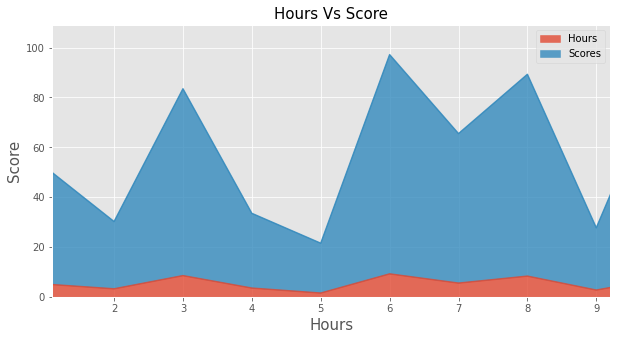

In [ ]:
#visualizing with area plot
xmin=min(df.Hours)
xmax=max(df.Hours)
df.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.title("Hours Vs Score",size=15)
plt.xlabel("Hours",size=15)
plt.ylabel("Score",size=15)
plt.show()

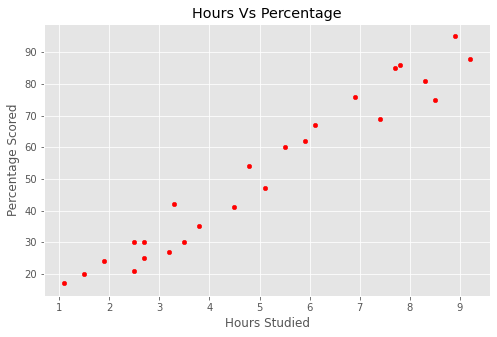

In [ ]:
#visualizing with scatter plot
df.plot(kind='scatter',x='Hours',y='Scores',color='r',figsize=(8,5))
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

# Modelling the data

In [ ]:
#modelling the data
x=np.asanyarray(df[['Hours']])
y=np.asanyarray(df['Scores'])

#using train test split to split the data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.4,random_state=2)
regressor=LinearRegression()
regressor.fit(train_x,train_y)
print("Training Completed")
print("Coefficients:",regressor.coef_)
print("Intercept:",regressor.intercept_)



Training Completed
Coefficients: [10.26062239]
Intercept: 1.1138100335929622


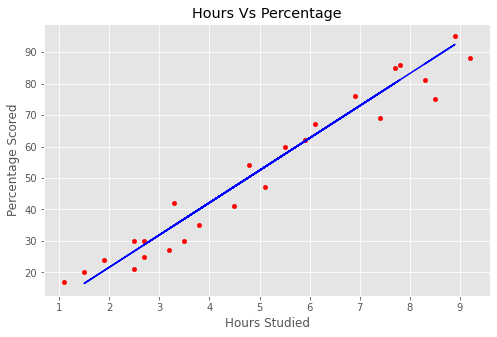

In [ ]:
df.plot(kind='scatter',x='Hours',y='Scores',color='r',figsize=(8,5))
plt.plot(train_x,regressor.coef_[0]*train_x + regressor.intercept_,color='b')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

In [ ]:
#evaluating mean absolute error and R2 using metrics to determine the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
y_pred=regressor.predict(test_x)
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_pred,test_y)))
print("R2 score: %.2f" % r2_score(y_pred,test_y))

Mean Absolute Error: 5.712732105282583
R2 score: 0.95


In [ ]:
#actual vs predicted
df2=pd.DataFrame({'Actual':test_y,'Predicted':y_pred})
df2

,Actual,Predicted
0,17,11.029003
1,21,25.628017
2,24,19.371297
3,88,95.494730
4,76,71.510634
5,25,27.713591
6,75,88.195222
7,30,25.628017


# Predicting score by given value

In [ ]:
#predicting the score by the value given
hours=9.25
predicted_score=regressor.predict([[hours]])
print(f'No. of hours={hours}')
print(f'Predicted Score={predicted_score[0]}')


No. of hours=9.25
Predicted Score=96.01612299632009
